In [15]:
import pandas as pd
A = pd.read_csv("E:/Data Science class/Datasets/Cars93.csv")

In [16]:
B = A[["Price","MPG.city"]]
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
B = pd.DataFrame(ss.fit_transform(B),columns=["Price","Mileage"])

In [17]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
model = km.fit(B)

In [18]:
model.cluster_centers_

array([[ 1.46141368, -0.72410737],
       [-0.28127091, -0.23437376],
       [-0.99779245,  1.68156148]])

In [19]:
model.labels_

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       2, 1, 1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2,
       1, 2, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 1, 1, 2, 0, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 0])

In [20]:
B['clustering_vector']=model.labels_

In [21]:
B

,Price,Mileage,clustering_vector
0,-0.375720,0.471312,1
1,1.497844,-0.781032,0
2,0.998227,-0.423219,0
3,1.893374,-0.602126,0
4,1.091905,-0.065407,0
5,-0.396538,-0.065407,1
6,0.134306,-0.602126,1
7,0.436158,-1.138845,0
8,0.706784,-0.602126,0
9,1.581114,-1.138845,0


In [22]:
Q = pd.DataFrame(model.cluster_centers_,columns=["c1","c2"])

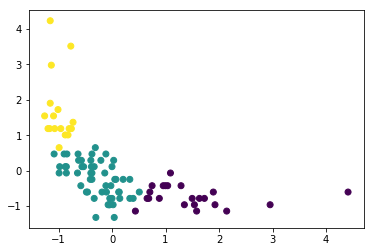

In [23]:
import matplotlib.pyplot as plt
plt.scatter(B.Price,B.Mileage,c=B.clustering_vector)
plt.show()
#plt.scatter(Q.c1,Q.c2,marker="+",c="red")

In [24]:
# # How to find best value of K(no of clusters)
# Elbow Curve(
# X --> K
# Y --> WCSS(Within clusters sum of squares) | Inertia | Distortion
# )

In [25]:
K = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
WCSS = []
for i in K:
   from sklearn.cluster import KMeans
   km = KMeans(n_clusters=i)
   model = km.fit(B)
   WCSS.append(model.inertia_)

In [26]:
WCSS

[224.73118279569886,
 116.34758115931075,
 55.24519288386834,
 41.833475506083126,
 28.80790677785146,
 17.936256379381916,
 14.231181445684408,
 12.299965954212007,
 10.860515812993514,
 9.549429665982487,
 8.40436497640762,
 7.616474027119513,
 6.560407871850987,
 5.837272567526937,
 5.345322164436943,
 4.881768758604049,
 4.413613886064767,
 4.016333550417015,
 3.7701321928991756,
 3.4722903523417292]

Text(0.5,1,'Elbow curve')

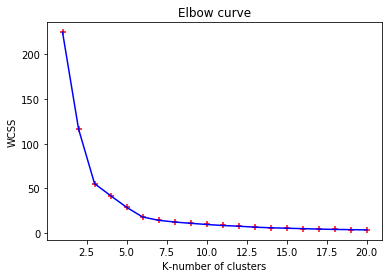

In [27]:
plt.scatter(K,WCSS,c="red",marker="+")
plt.plot(K,WCSS,c="blue")
plt.xlabel("K-number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow curve")